# 泰坦尼克号幸存者预测 

## 数据科学分析基本流程

Data Science Solutions book 这本书为类似 Kaggle 网站上解决数据科学竞赛问题，提供了一个典型的分析流程：

- 定义问题
- 获取训练数据以及测试数据
- 加工、准备以及清洗数据
- 分析、识别数据的模式，并对数据做可视化
- 建模、预测，并解决问题
- 对结果做可视化，生成报告，并且展示问题的解决步骤和最终的解决方案
- 提交结果

现实情况下，不会严格遵循以上流程：

- 可能会结合多个步骤。例如，在分析过程中就开始用可视化
- 提前执行某个步骤。例如,数据加工前后都会对数据进行分析
- 多次执行某个步骤。例如，多次对数据进行可视化
- 完全弃用一个步骤。例如在非竞赛场合可能并不需要做提交结果的步骤

## 流程目标

主要有7个目标：

- **分类**：可能要对我们的样本进行分类。我们可能也希望了解不同类和我们的目标之间的关联。
- **相互性**：我们可以根据训练集里可用的特征来解决一个问题。那到底在数据集里的哪些特征会对解决问题起着至关重要的作用呢？从统计学上来说，是否在某个特征与问题的解之间存在某种联系？如果这个特征的值改变后，相应问题的解是否也会改变呢？反过来的情况是否也是如此呢？这个可以通过对数据集里的数值型以及离散型的特征做测试来得到。我们可能也希望得到特征之间的关系，而不是直接得到特征与问题解之间的关系。找到一些特定属性之间的关联性可能会在创建、补全以及修正特征上起到一定作用
- **转换**：对于建模阶段，我们需要去对数据进行预处理。根据模型的算法，可能需要将特征值全部转化为数字值。例如把文本特征值转化为数字值。
- **填缺**：数据的准备工作中可能也需要我们去估计一些特征的缺失值，当没有缺失值时，模型算法可能效果最好。
- **修正**：我们也可以去分析数据集中的错误以及可能存在的异常特征值，从而去修正这些包含错误值的样本。一种方法是检测样本或特征中的异常值。如果一个特征不适合分析，或者会严重影响结果，我们也可以完全舍弃掉它。
- **创造**：我们可以根据已存在的特征或者特征序列来创建新的特征，使得新特征符合相关性、转换以及完整性目标
- **制图**：如何根据原数据集以及要解决问题，对数据做合适的可视化图 



## 定义问题


“在训练数据中，提供了在泰坦尼克号上乘客的具体数据以及他们是否在那次灾难中存活的信息。参赛者能否通过已有的训练数据训练出一个模型，此模型需要根据输入的测试数据里乘客信息，来预测此乘客是否能在灾难中存活”

我们可能也想要通过问题描述获取更多有关此问题的信息。在此问题的描述中，比较有意义的描述如下：
    - 泰坦尼克号在1912年4月15日与冰山碰撞后沉没。在一共2224名乘客与船员里，有1502人不幸逝世。这个信息即表明了此次事件中生还率为32%。
    - 一个使得在这次灾难中有如此之大死亡率的原因是：在船上没有足够的救生船提供给乘客以及船员
    - 尽管在此次灾难中生还存在运气的成分，但是仍旧会有些群体的生还率高于其他人，如女人、小孩，以及上等仓的人

## 代码实现

### 参考文章
- [How I scored in the top 9% of Kaggle’s Titanic Machine Learning Challenge
](https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9)
- [How to score 0.8134 in Titanic Kaggle Challenge(https://www.ahmedbesbes.com/blog/kaggle-titanic-competition)
- [Predicting the Survival of Titanic Passengers](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

### 导入相关库

导入需要的库，同时，进行一些初始化的设置。

In [1]:
import numpy as np  # 科学计算工具包
import pandas as pd  # 数据分析工具包
import matplotlib.pyplot as plt # 图表绘制工具包
import seaborn as sns # 基于 matplot, 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，这会提高图表的可读性和美观性

# 算法库
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# 在 jupyter notebook 里面显示图表
%matplotlib inline 

### 获取数据集

读取参数指定的文件，返回一个DataFrame类型的对象。

有两个数据集：训练集和测试集。 我们将使用训练集来构建我们的预测模型，用测试集来对其进行评分并生成输出文件以在Kaggle评估系统上提交。

In [2]:
test_df = pd.read_csv("../input/titanic/test.csv")
train_df = pd.read_csv("../input/titanic/train.csv")

### 探索性数据分析

开始探索数据，带着问题去理解数据。

通过以下的属性和方法了解数据
+ 属性
    + `df.columns.value` 数据集中所有列名(特征),numpy.ndarray 类型
+ 方法
    + `df.head()`  预览数据集前5行
    + `df.tail()`  预览数据集后5行
    + `df.info()`  显示大致数据信息，包括每列名称，非空值数量，每列的数据类型，内存占用等信息。
    + `df.describe()` 展示数据的一些描述性统计信息,但会过滤掉缺失值。默认只统计数值类型的字段内容。
        - `describe(include=‘ALL‘)`,统计所有类型的数据
        - `describe(include=[np.number])` 只统计数值类型的字段内容：count计数，mean平均数，std方差，min最小值，四分位数，max 最大值
        - `describe(include=[np.object])` 只统计object类型的字段内容
        - `describe(include=‘O’)` 只统计字符串类型的字段内容：count计数，unique唯一值数量，top出现频率最高的内容，freq最高出现频率
        - `describe(percentiles=[])`:设置输出的百分位数，默认为[.25，.5，.75]，返回第25，第50和第75百分位数。

#### 预览数据 

- `df.head()` 预览数据集前5行

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Survived 列是目标变量，这是我们要预测的变量。** 如果 Survived 为 1，乘客幸免于难，为 0，表示未存活。

Survived |  是否存活
-|-
0 | 死亡
1 | 存活

其他描述乘客的变量，是**特征**。

数据特征 | 意思  
-|-
PassengerId | 乘客ID
Pclass | 乘客等级(1,2,3)
Name | 乘客姓名
Sex | 乘客性别 (Female,Male)
Age | 乘客年龄
SibSp | 与乘客同行的兄弟姐妹和配偶的数量
Parch | 与乘客同行的父母和孩子的数量
Ticket | 船票号码
Fare | 票价
Cabin | 船舱号码
Embarked | 乘客登船港口(C = Cherbourg, Q = Queenstown, S = Southampton)


#### 数据集的大致信息

`df.info()` 显示大致数据信息，包括每列名称，非空值数量，每列的数据类型，内存占用


In [4]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

* 训练数据集
    - 行数 ： 891个样本大小
    - 列数 ：12（11个特征+1个**目标变量 Survived**）
    - 数据类型 ： 7个特征是整数或浮点数，5个特征是字符串
    - 缺失值情况 ：Cabin > Age > Embarked  (数量从大到小排序)
    - 数值型数据 ：PassengerId，Age，Fare,SibSp,Parch
    - 类别数据 ：Survived,Sex,Embarked,Pclass
    - 混合型数据：Ticket,Cabin 

* 测试数据集
    - 列数 ：11个特征
    - 数据类型 ： 6个特征是整数或浮点数，5个特征是字符串
    - 缺失值情况 ：Cabin > Age > Fare (数量从大到小排序)

------

**知识点**
* **类别数据(定性数据)**

    数据被划分为各种类别，用以描述某类得性质或特征。因此，类别数据也称为定性数据。游戏种类就是定性数据的一个实例 —— 每种游戏种类形成一个独立的类别。关于定性数据，请记住一个重点：不能将数据值理解为数字。
    

* **数值型数据(定量数据)**

    数值型数据不同，它所涉及的是数字。数值型数据中的数值具有数字的意义，但还涉及计量或计数。由于数值型数据描述的是数量，所以也称为定量数据。

------

#### 数据集的描述性统计信息

`df.describe()` 返回数据数值情况，数值数据的字段内容：count计数，mean平均数，std方差，min最小值，四分位数，max 最大值 

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survied 的均值为 0.383838，而 survied 值只有0或1，说明这个均值反应了存活率。
    + 样本存活率约38%，实际存活率为32%(2224-1502/2224=32.4%)
    
从目前来看，要注意几点。

- 需要将非数值型特征转换为数值型特征，以便机器学习算法后期处理。
- 这些特征的范围有很大的差异，需要将其转换为大致相同的尺度。
- 一些特征包含缺失值（NaN = 不是数字），们需要处理。

#### 数据集缺失值详情

- `df.isnull()` 返回表明哪些值是缺失值的布尔值
- `df.notnull()` 返回表明哪些值不是缺失值的布尔值
- `df.dropna()` 根据每个标签的值是否是缺失数据来筛选轴标签，并根据允许丢失的数据量来确定阀值
- `df.sort_values()` 排序，默认升序，ascending = False表示降序
- `pd.concat([])` 使对象在轴向上进行粘合或“堆叠“，默认是沿着 axis=0(行) 的轴向。axis=1 表示(列)的轴向。
- `round(x[, n])` 方法返回浮点数x的四舍五入值,n小数点位数

In [6]:
train_total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)
train_miss_data = pd.concat([train_total,percent_2],axis=1,keys=['total','%'])
train_miss_data.head()

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [7]:
test_total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)
test_miss_data = pd.concat([test_total,percent_2],axis=1,keys=['total','%'])
test_miss_data.head()

,total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0


* 训练数据集
    + Embarked 特征只有2个缺失的值，可以很容易地填补。
    + Age 特征就比较麻烦了，因为它有177个缺失值。
    + Cabin 特征需要进一步调查，但看起来可能要从数据集中删除它，因为缺失值比例高达 77%。
* 测试数据集
    + Fare 特征只有1个缺失的值，可以很容易地填补。
    + Age 特征有86个缺失值。
    + Cabin 特征需要进一步调查，但看起来可能要从数据集中删除它，因为缺失值比例高达 78.2%。

isnull用法 

- df.isnull()  #元素为空或者NA就显示True，否则就是False
- df.isnull().any()  #判断哪些列包含缺失值，该列存在缺失值则返回True，反之False。

对比count() 、isnull().count()和isnull().sum()

- df.count() #每一列中非缺失值的个数
- df.isnull().count() #每一列总元素个数
- df.isnull().sum() #每列缺失数据的个数

#### 假设

**哪些特征可能和存活有关？**

In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

初步判断，除了PassengerId、Ticket和 Name之外,其他特征都可能与存活有关。

##### 1.1 数值型 Age、类别型 Sex、类别型 Survived 三者之间的关系:

* 首先将数据按照性别(Female, Male)划分 
* 基于性别，再根据存活状态(Survived,Not_Survived)划分 
* 就会有四种搭配
        - Female & Survived
        - Female & Not_Survived
        - Male & Survived
        - Male & Not_Survived
* 鉴于 Age 特征有缺失值，在此处可视化分析时，需要去除 Age 的缺失值

In [9]:
# 按性别筛选出数据
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# 在性别的基础上筛选出存活和未存活的数据

# 选出存活的数据
F_survived = women[women['Survived']==1]
M_survived = men[men['Survived']==1]

# 选出未存活的数据
F_not_surv = women[women['Survived']==0]
M_not_surv = men[men['Survived']==0]

F_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


求某一列的缺失值情况

由于 Dataframe 数据中选择某一列的方式有 (按照字典型标记或属性那样检索为 Series)
    - df.A 的属性方式
    - df['A'] 的方式
所以求某一列的缺失值情况也有两种
    - df.A.isnull().sum()
    - df['A'].isnull().sum()

根据某一列去除缺失值
    - df.A.isnull().dropna()
    - df['A'].isnull().dropna()

In [10]:
# 每种数据去除 Age 缺失值
print('去除前，Female survived null', F_survived.Age.isnull().sum())

# 去除 Age 缺失值
F_survived.Age.dropna()
M_survived.Age.dropna()
F_not_surv.Age.dropna()
M_not_surv.Age.dropna()

print('取出后，Female survived null',F_survived.Age.dropna().isnull().sum())

去除前，Female survived null 36
取出后，Female survived null 0


----
**知识点**

displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途。具体用法如下：：

```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```
    - 参数 ax：选择位置
    - 参数 hist、kde，调节是否显示直方图及核密度估计(默认hist,kde均为True)

---

问题：直方图中参数 bins，这里是根据什么设置的?

- 极端情况, bins = 1
上图展现了极端情况, 当 bins = 1，表示所有的数据都在一个组内。分组太粗糙影响数据分组规律的明显性，什么都看不出。

- 极端情况, bins = 数据大小
下图进行极端情况的对比, 当 bins = len(data)，表示如果所有的数据都不同,将出现和数据长度一样的组。分组太细致会引起较大的误差，因此组数的确定要适当。

组距的宽度：用数据中(最大值-最小值)/组数

----


Text(0.5, 1.0, 'Male')

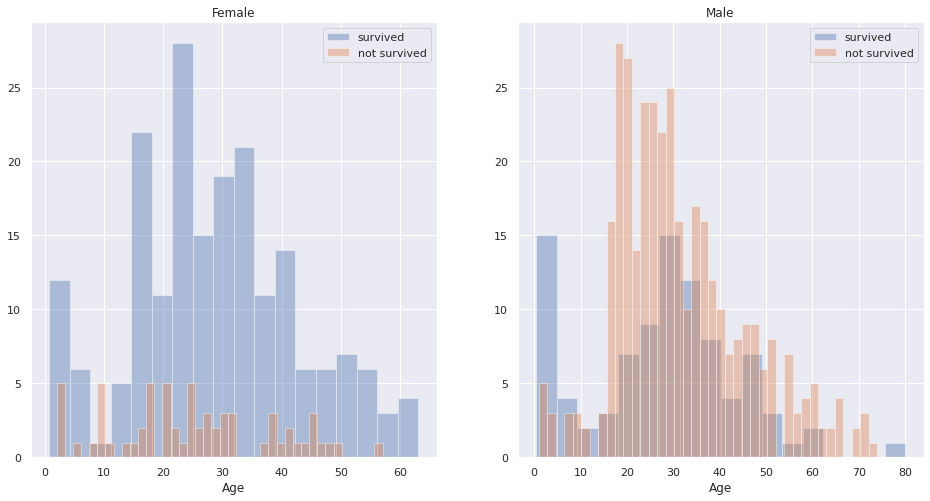

In [11]:
sns.set() # 声明使用 Seaborn 样式

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8)) # 创建一个 Figure, 子图为1行，2列
survived = 'survived' # 图例 label 
not_survived = 'not survived' # 图例 label

ax = sns.distplot(F_survived.Age.dropna(),bins=18,ax=axes[0],kde=False)
ax = sns.distplot(F_not_surv.Age.dropna(),bins=40,ax=axes[0],kde=False)
ax.legend([survived,not_survived]) # 图例 label 放置位置1
ax.set_title('Female')

ax = sns.distplot(M_survived.Age.dropna(),bins=18,ax=axes[1],label=survived,kde=False) # 图例 label 放置位置2
ax = sns.distplot(M_not_surv.Age.dropna(),bins=40,ax=axes[1],label=not_survived,kde=False)
ax.legend()
ax.set_title('Male')

可以看出

- 对于男性来说，大概20岁到35岁之间的存活率较高的；5岁到18岁之间的存活概率很低，
- 对于女性来说，大概15岁到40岁之间的存活概率更高
- 无论男女，婴儿的存活概率会高一点。

似乎有一些特定的年龄段，存活几率会增加。下面来观察 Age 和 Survived 的关系

###### 1.2 数值型 Age、 类别型 Survived 两者之间的关系

FacetGrid当您想要在数据集的子集中分别可视化变量的分布或多个变量之间的关系时，该类非常有用。一个FacetGrid可以与多达三个维度可以得出：row，col，和hue。前两个与得到的轴阵列有明显的对应关系; 将色调变量视为沿深度轴的第三个维度，其中不同的级别用不同的颜色绘制。

```
FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
```

- col 列上的变量(左右)
- row 行上的变量(上下)

这里将 FacetGrid 函数用于不同存活率的值，独立分成两个直方图。

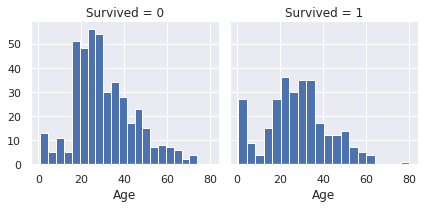

In [12]:
import matplotlib.pyplot as plt #导入 matplotlib.pyplot，并简写成plt
import seaborn as sns
import numpy as np  #导入numpy包，用于生成数组
import pandas as pd #导入pandas包，用于数据分析
#IPython notebook中的魔法方法，这样每次运行后可以直接得到图像，不再需要使用plt.show()
%matplotlib inline  

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

可以看出
- 婴儿（Age<=4）有较高的生存率
- 老人（Age=80）全部生还
- 大量的15-25年纪的乘客没有生还
- 乘客主要在15-35的年纪范围内

###### 1.3 类别型 Sex、 数值型 Survived 两者之间的关系 (这里用的是数值型 Survived，可能需要放到其他位置)

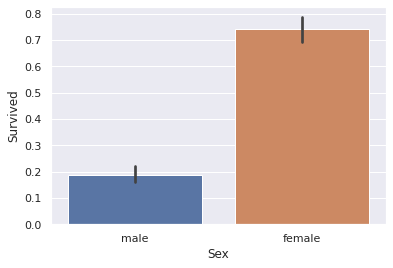

In [13]:
import matplotlib.pyplot as plt #导入 matplotlib.pyplot，并简写成plt
import seaborn as sns
import numpy as np  #导入numpy包，用于生成数组
import pandas as pd #导入pandas包，用于数据分析
#IPython notebook中的魔法方法，这样每次运行后可以直接得到图像，不再需要使用plt.show()
%matplotlib inline  

sns.barplot(x='Sex', y='Survived', data=train_df)

可以看出，女性乘客的幸存率比男性高。

##### 2.1 类别型 Embarked、类别型 Pclass、类别型 Sex、数值型 Survived 4者之间的关系

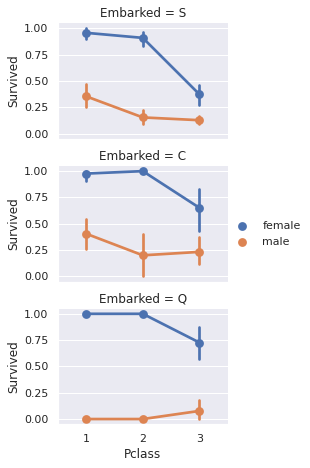

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked',height=2.2, aspect=1.6) 
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex',palette='deep',hue_order=['female','male'],order=[1,2,3]) 
grid.add_legend()

按照性别分类，Embarked 似乎与存活率有关。

- 不论从哪个港口登船，Pclass 一样的前提下，女性乘客的存活率都高于男性。
- 对于从S或C港口登船的男性乘客中，Pclass=1的存活率比 Pclass =2, Pclass=3 都高。
- 对于从Q港口登船的男性乘客中，Pclass=3的存活率比 Pclass =1, Pclass=2 高。

Pclass 似乎也与存活率有关。下面来观察 Pclass 和 Survived 的关系

##### 2.2类别型 Pclass、 数值型 Survived 两者之间的关系

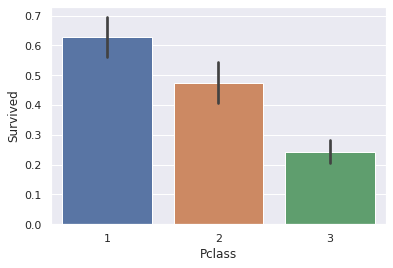

In [15]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

明显可以看出 Pclass=1的乘客存活率更高

##### 2.3 类别型 Pclass、数值型 Age、 类别型 Survived 三者之间的关系

aspect:每个小图表的横轴长度和纵轴的比，默认为1; height:每个小图表的高度设定，默认为3

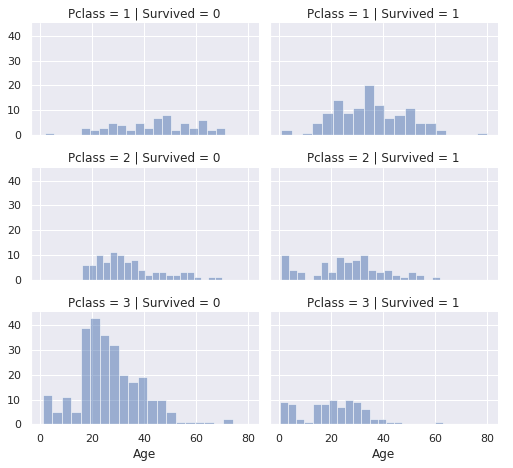

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

可以看出
- Pclass=3有最多的乘客，但是大多数没有存活下来
- Pclass=2和Pclass=3的婴儿乘客大多幸存
- Pclass=1中大多数乘客幸存

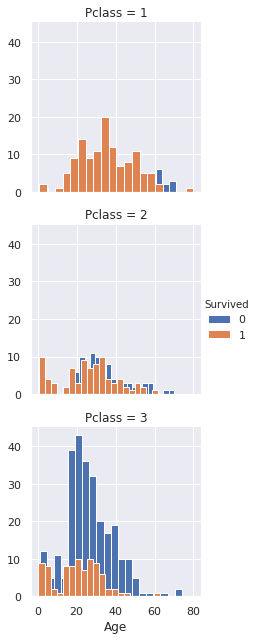

In [17]:
# 或者用这个
grid = sns.FacetGrid(train_df,hue='Survived',row='Pclass')
grid.map(plt.hist,"Age",bins=20)
grid.add_legend()

##### 2.4 数值型 SibSp、 数值型 Parch、 数值型 Survived 3者之间的关系

SibSp 和 Parch 组合在一起使用才更有意义，组合起来表示与乘客同行的亲属人数。并计算出单独出行和非单独出行的人数

In [18]:
data = [train_df, test_df]  # 训练集和测试集
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()


1    537
0    354
Name: not_alone, dtype: int64

知识点：**[loc 根据条件，对新增列赋值](https://blog.csdn.net/qq_36523839/article/details/80502574)**

`df.loc[条件,新增列] = 赋初始值`

如果新增列名为已有列名，则在原来的数据列上改变

In [19]:
df1 = pd.DataFrame(np.random.rand(8,4),index=list('abcdefgh'),columns=['A','B','C','D'])
print(df1)

df1.loc[df1['A']<0.5,'小于0.5'] = 1
df1.loc[df1['A']>0.5,'小于0.5'] = 0
print(df1)

          A         B         C         D
a  0.075956  0.513582  0.090774  0.542909
b  0.156261  0.873195  0.974398  0.920191
c  0.015779  0.786579  0.356560  0.604733
d  0.574546  0.742924  0.243504  0.751018
e  0.814584  0.196367  0.067841  0.232922
f  0.480406  0.103638  0.301940  0.153113
g  0.863849  0.479492  0.110800  0.322068
h  0.395352  0.851746  0.858481  0.225225
          A         B         C         D  小于0.5
a  0.075956  0.513582  0.090774  0.542909    1.0
b  0.156261  0.873195  0.974398  0.920191    1.0
c  0.015779  0.786579  0.356560  0.604733    1.0
d  0.574546  0.742924  0.243504  0.751018    0.0
e  0.814584  0.196367  0.067841  0.232922    0.0
f  0.480406  0.103638  0.301940  0.153113    1.0
g  0.863849  0.479492  0.110800  0.322068    0.0
h  0.395352  0.851746  0.858481  0.225225    1.0


知识点：**value_counts() 方法**

返回一个序列 Series，该序列包含每个值的数量。也就是说，对于数据框中的任何列，value-counts () 方法会返回该列每个项的计数。

- 对该列中出现的每个值进行计数(无效值会被排除)  默认降序排序
    - `value_counts(ascending=True)` 升序
- 求各个值的相对频率
    - `value_counts(normalize=True)`

In [20]:
df1 = pd.DataFrame(np.random.rand(8,4),index=list('abcdefgh'),columns=['A','B','C','D'])
print(df1)

df1.loc[df1['A']<0.5,'小于0.5'] = 1
print(df1)
print(df1['小于0.5'].value_counts())
df1.loc[df1['A']>0.5,'小于0.5'] = 0
print(df1['小于0.5'].value_counts(normalize=True))

          A         B         C         D
a  0.387505  0.040494  0.105987  0.320365
b  0.990164  0.930623  0.644406  0.467170
c  0.932130  0.681749  0.080384  0.409407
d  0.985110  0.305801  0.690751  0.145207
e  0.247883  0.645068  0.049671  0.899674
f  0.654758  0.152449  0.750448  0.716139
g  0.753139  0.387617  0.299998  0.236939
h  0.937349  0.227210  0.722307  0.555785
          A         B         C         D  小于0.5
a  0.387505  0.040494  0.105987  0.320365    1.0
b  0.990164  0.930623  0.644406  0.467170    NaN
c  0.932130  0.681749  0.080384  0.409407    NaN
d  0.985110  0.305801  0.690751  0.145207    NaN
e  0.247883  0.645068  0.049671  0.899674    1.0
f  0.654758  0.152449  0.750448  0.716139    NaN
g  0.753139  0.387617  0.299998  0.236939    NaN
h  0.937349  0.227210  0.722307  0.555785    NaN
1.0    2
Name: 小于0.5, dtype: int64
0.0    0.75
1.0    0.25
Name: 小于0.5, dtype: float64


知识点 **astype(int)**

用于转化dateframe某一列的数据类型

如下将dateframe某列的str类型转为int，注意astype()没有replace=True的用法，想要在原数据上修改，要写成如下形式。

`app_train[['uid','index']] = app_train[['uid','index']].astype(int)`

注意只有当该列的字符串全是由纯数字构成时才可以这样写，如果混有字母，会报错：ValueError: invalid literal for int() with base 10

利用int()函数转字符串也类似

isdigit()用于判断一个字符串是否由纯数字构成，如果是返回True,否则False

In [21]:
df1['小于0.5'].astype(int).value_counts()

0    6
1    2
Name: 小于0.5, dtype: int64

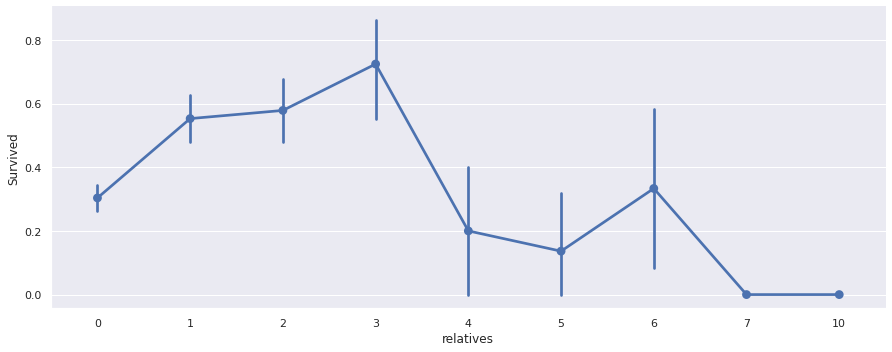

In [22]:
grid = sns.catplot('relatives','Survived', data=train_df, kind='point',aspect = 2.5)

观察：
- 同行家属在1到3位的存活率较高
- 除了6位，同行家属只有1位或者超过3位的存活率较低

决策：
- 纳入模型

### 特征工程

训练集和测试集都需要处理，所以将其合并。

方法
- 删除无关特征
- 创建新的特征(根据已有特征，挖掘有效信息创建新的特征)
- 处理缺失值
    根据之前我们知晓的缺失值情况,对其一一处理
    * 训练数据集
        + Embarked 特征只有2个缺失的值，可以很容易地填补。
        + Age 特征就比较麻烦了，因为它有177个缺失值。
        + Cabin 特征需要进一步调查，但看起来可能要从数据集中删除它，因为缺失值比例高达 77%。
    * 测试数据集
        + Fare 特征只有2个缺失的值，可以很容易地填补。
        + Age 特征有86个缺失值。
        + Cabin 特征需要进一步调查，但看起来可能要从数据集中删除它，因为缺失值比例高达 78.2%。

In [23]:
# 合并训练集和测试集
titanic = train_df.append(test_df, ignore_index=True)

# 保存测试集的 PassengerId 用于最后提交
passengerId = test_df.PassengerId

# 创建索引，后期用于分开数据集
train_idx = len(train_df)
test_idx = len(titanic) - len(test_df)

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  relatives    1309 non-null   int64  
 13  not_alone    1309 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 143.3+ KB
None


#### 处理特征 PassengerId - 删除特征

训练集中删除特征 PassengerId，因为它并不会对生存率造成什么影响。目前不能删除测试集中 PassengerId，因为要提交。

In [24]:
#train_df = train_df.drop(['PassengerId'], axis=1)

#### 处理特征 Name - 创建新的特征:乘客称谓

在查看乘客姓名时，人们可能想知道如何处理它们以提取有用的信息。如果你仔细看看这些第一个例子：

- Braund, Mr. Owen Harris
- Heikkinen, Miss. Laina
- Peter, Master. Michael J

你会注意到每个名字都有一个称谓！这可能是一个简单的小姐（Miss.）或太太（Mrs.），但它有时可能像 Master，Sir 那样更复杂。在这种情况下，可以对称谓进行大的分类。让我们看看我们将如何在下面的函数中执行此操作。

让我们先来看看在训练集中有什么不同的称谓。

In [25]:
# 正则测试
import re

test = 'Braund,the Countess. Owen Harris'
pattern =re.compile(",(.+)\.")
print(pattern.search(test).group(1))

the Countess


In [26]:
# 训练集
train_df['Title'] = train_df['Name'].map(lambda x:(re.compile(",(.+?)\.").search(x).group(1)).strip())
print(list(train_df['Title'].drop_duplicates()))

# 测试集
test_df['Title'] = test_df['Name'].map(lambda x:(re.compile(",(.+?)\.").search(x).group(1)).strip())
print(list(test_df['Title'].drop_duplicates()))

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']
['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']


于是我们把称谓信息提取出来，由于有些称谓的人数量过少，我们还需要做一个映射

- Mme：称呼非英语民族的"上层社会"已婚妇女,及有职业的妇女，相当于Mrs
- Jonkheer:乡绅
- Capt：船长？。。
- Lady：贵族夫人的称呼
- Don：是西班牙语中贵族和有地位者的尊称
- sir：都懂
- the Countess：女伯爵
- Ms：Ms.或Mz 美国近来用来称呼婚姻状态不明的妇女
- Col：中校:Lieutenant Colonel(Lt. Col.)上校:Colonel(Col.)
- Major：少校
- Mlle:小姐
- Rev：牧师

In [27]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona":"Royalty"
}

titanic['Title'] = titanic['Name'].map(lambda x:(re.compile(",(.+?)\.").search(x).group(1)).strip())
titanic['Title'] = titanic['Title'].map(Title_Dictionary)

# 查看缺失值
print(titanic['Title'].isnull().sum())
#titanic[titanic['Title'].isnull() == True]

0


Oliva y Ocana, **Dona**. Fermina。这在训练数据集中没有遇到这个称谓，测试集中的Dona是女士的尊称。

In [28]:
# 相同尊称的人数
titanic['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

创建 Title 特征，还能用来更好地估计缺失值的年龄。

#### 处理特征 Age - 缺失值填写

不是简单地用数据集的平均年龄或中位年龄来填补缺失的Age值，而是通过对乘客的性别、等级和进行分组，我们可以更深入地了解乘客的年龄。

我们将按照性别、Pclass（乘客等级）和Title对数据集进行分组，并为每个子集计算中位数年龄。

为了避免测试集中的数据泄漏，使用从训练集计算的值来填充测试集中的年龄。

In [29]:
grouped = titanic.groupby(['Sex','Pclass', 'Title'])  
grouped["Age"].median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

此 dataframe 将帮助我们根据不同的标准估算缺失的年龄值。查看中位年龄列，看看这个值如何根据 Sex，Pclass 和 Title 组合在一起。
例如：

- 如果乘客是女性，则来自 Pclass 1 和来自王室（royalty），中位年龄为40.5岁。
- 如果乘客是男性，来自 Pclass 3，拥有 Mr 称谓，则年龄中位数为26岁。

用不同组合的的中位数年龄填充缺失的年龄。

In [30]:
titanic["Age"] = grouped["Age"].apply(lambda x: x.fillna(x.median()))

# 查看处理后的情况
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  relatives    1309 non-null   int64  
 13  not_alone    1309 non-null   int64  
 14  Title        1309 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 153.5+ KB


##### 处理特征 Cabin - 创建新的特征：甲板号 (暂时不用这个方法)

之前想直接删除'Cabin'这个特征，但后来我发现了一些有趣的东西。船舱号码'C123'，看起来字母代表的是甲板号。因此，我们要提取这些并创建一个新的特征，其中包含一个人的甲板号

- fillna 对缺失值进行填充
Pandas 中，缺失数据一般采用 NaN 标记 NaN 代表 Not a Number。特别地，在时间序列里，时间戳的丢失采用 NaT 标记。

In [31]:
# 训练集
train_df['Cabin'] = train_df['Cabin'].fillna("U0") # 将缺失值填充为 “U0”  表示 Unknow
# 正则获取夹板号 并 使用 drop_duplicates() 去重
print(list(train_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()).drop_duplicates()))

['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']


In [32]:
# 测试集
test_df['Cabin'] = test_df['Cabin'].fillna("U0") # 将缺失值填充为 “U0”  表示 Unknow
# 正则获取夹板号 并 使用 drop_duplicates() 去重
print(list(test_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()).drop_duplicates()))

['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G']


对 NAN 填充"U0"，去重，可以看到甲板号，训练集从A到G,然后T，而测试集是从A到G，没有任何不存在于训练集中的夹板号。

我们把这个特征转换成一个数字变量。缺少的值将被转换为零。

In [33]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic['Cabin'] = titanic['Cabin'].fillna("U0") # 没有船舱号 将缺失值填充为 “U0”
titanic['Deck'] = titanic['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())#正则获取夹板号
titanic['Deck'] = titanic['Deck'].map(deck) # 通过字典用 map 映射夹板号为数字
titanic['Deck'] = titanic['Deck'].fillna(0) # 没有夹板号 将缺失值填充为 “0”
titanic['Deck'] = titanic['Deck'].astype(int) # 将dateframe某一列的数据类型转化为整数型

# 处理完删除 cabin 特征
# train_df = train_df.drop(['Cabin'], axis=1)
# test_df = test_df.drop(['Cabin'], axis=1)

# 处理后的情况
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
 12  relatives    1309 non-null   int64  
 13  not_alone    1309 non-null   int64  
 14  Title        1309 non-null   object 
 15  Deck         1309 non-null   int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 163.8+ KB


##### 知识点：正则表达式

- `"([a-zA-Z]+)"` 这个表示至少匹配1个或多个大/小写字母，带分组
    - . 匹配除换行符之外的任意字符
    - + 匹配前面的字符1次或多次（>=1）
    - [a-zA-Z_] 可以匹配一个字母无论大小写

- `re.compile(pattern, flags=0)`
这个方法可以将正则字符串编译成正表达式对象（Pattern对象），以便在后面的匹配中复用
    ```
    prog = re.compile(pattern)
    result = prog.search(string)
    ```
    等价于
    `result = re.search(pattern, string)`

- 分组
可以使用group(num) 或 groups() 匹配对象函数来获取匹配表达式。
    - group(num=0) 匹配的整个表达式的字符串
    - group() 可以一次输入多个组号，在这种情况下它将返回一个包含那些组所对应值的元组。
    - groups() 返回一个包含所有小组字符串的元组，从 1 到 所含的小组号。
    
- 匿名函数
`lambda x: x * x`
关键字lambda表示匿名函数，冒号前面的x表示函数参数。等价于
    ```
    def f(x):
        return x * x
    ```

- 映射
    - Series 数据
        - s.map() 都是把对应的数据逐个当作参数传入到字典或函数中，得到映射后的值
            - 使用字典进行映射
            - 使用函数进行映射
        - s.apply() 作用原理和map方法类似，区别在于apply能够传入功能更为复杂的函数(传入map的函数只能接收一个参数)
    - DataFrame 数据(默认 axis=1)  (axis=1为横向，axis=0为纵向)
        - df.apply() 将函数应用到每行或者每一列上面
            - axis =1 将每一行数据以Series的形式（Series的索引为列名）传入指定函数
            - axis =0 将各列(columns)以Series的形式作为参数，传入到你指定的操作函数中 
        - df.applymap() 将某函数应用到每一个元素上
        
- astype(int)
    用于转化dateframe某一列的数据类型

##### 处理其他特征 Embarked、Fare - 缺失值填充

- 训练集中 Embarked 特征只有2个缺失的值，用众数进行填补。
- 训练集中 Fare 特征只有1个缺失的值，用中位数进行填补。
- 训练集中 Cabin 特征有687个缺失的值，用常数 ‘U’(Unknow) 进行填补。

    - 众值填充
        - `df.fillna(df.value_counts().index[0]) `
        - `df.fillna(df.mode().iloc[0]) `

    - 中位数填充
    `df.fillna(df.median())` 

In [34]:
# 用 value_counts() 获取众数
print(titanic['Embarked'].value_counts()) # 默认降序

# 获取行标签
print(titanic['Embarked'].value_counts().index)

# 获取第一行的行标签
print(titanic['Embarked'].value_counts().index[0])

S    914
C    270
Q    123
Name: Embarked, dtype: int64
Index(['S', 'C', 'Q'], dtype='object')
S


In [35]:
# 用 mode() 获取众数
print(titanic['Embarked'].mode())
print(titanic['Embarked'].mode().iloc[0])

0    S
dtype: object
S


In [36]:
# 用众数填充 Embarked
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode().iloc[0])

# 用中位数填充 Fare
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

# 用‘U’填充 Cabin
titanic['Cabin'] = titanic['Cabin'].fillna('U')

# 看处理后结果
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  relatives    1309 non-null   int64  
 13  not_alone    1309 non-null   int64  
 14  Title        1309 non-null   object 
 15  Deck         1309 non-null   int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 163.8+ KB


#### 处理特征 SibSp 和 Parch - 创建新的特征 FamilySize 

In [37]:
# 同行家庭数 (包括乘客本身)
titanic['FamilySize'] = titanic['Parch'] + titanic['SibSp'] + 1

#### 处理特征 Cabin - 创建新的特征 Deck
船舱号码'C123'，看起来字母代表的是甲板号。因此，我们要提取这些并创建一个新的特征，其中包含一个人的甲板区域

In [38]:
titanic['Deck'] = titanic['Cabin'].map(lambda x: x[0])
titanic['Deck']

0       U
1       C
2       U
3       C
4       U
       ..
1304    U
1305    C
1306    U
1307    U
1308    U
Name: Deck, Length: 1309, dtype: object

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Title,Deck,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,Mr,U,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,Miss,U,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,C,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,Mr,U,1


#### 编码

在开始建模之前，我们要执行的最后一步是将我们所有的分类特征转换为数字，因为我们的算法只能接受一个数字数组作为输入，而不是名字或字母。我们有几个列要转换。

为什么要进行特征编码？

我们拿到的数据通常比较脏乱，可能会带有各种非数字特殊符号，比如中文。下面这个表中显示了我们最原始的数据集。而实际上机器学习模型需要的数据是数字型的，因为只有数字类型才能进行计算。因此，对于各种特殊的特征值，我们都需要对其进行相应的编码，也是量化的过程。

对于分类型数据的编码，我们通常会使用两种方式来实现，分别是：one-hot encoding 和 label-encoding。

在pandas中有现成的独热编码方法 pd.get_dummies()方法，将分类特征转换为数字特征。


Label-Encoding, (独热编码)One-Hot-Encoder 编码区别
[Categorical encoding using Label-Encoding and One-Hot-Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)

[机器学习“特征编码”](https://zhuanlan.zhihu.com/p/42075740)

In [40]:
# 将性别转化为整数形式
titanic['Sex'] = titanic['Sex'].map({"male": 0, "female":1})

# 类别变量转化为dummy 变量
pclass_dummies = pd.get_dummies(titanic.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(titanic.Title, prefix="Title")
deck_dummies = pd.get_dummies(titanic.Deck, prefix="Deck")
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix="Embarked")

# 合并 dummy 列和原数据集
titanic_dummies = pd.concat([titanic, pclass_dummies, title_dummies, deck_dummies, embarked_dummies], axis=1)

# 删除类别字段
titanic_dummies.drop(['Pclass', 'Title', 'Cabin','Deck','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

titanic_dummies.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,FamilySize,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,0,22.0,1,0,7.2500,1,0,2,...,0,0,0,0,0,0,1,0,0,1
1,2,1.0,1,38.0,1,0,71.2833,1,0,2,...,1,0,0,0,0,0,0,1,0,0
2,3,1.0,1,26.0,0,0,7.9250,0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,1,0,2,...,1,0,0,0,0,0,0,0,0,1
4,5,0.0,0,35.0,0,0,8.0500,0,1,1,...,0,0,0,0,0,0,1,0,0,1


我们的数据现在已经是我们需要的格式，使用之前的 train_idx 和 test_idx 索引分离训练集和测试集。

还将把训练集分成X，代表预测变量，y 代表我们的目标变量，即 Survived 特征。

- ？问题：Survived 特征合并前是 int64 的格式，为什么合并后变成了 float64 的格式
- ？问题：警告需要解决

In [41]:
# 分离训练集和测试集
train = titanic_dummies.iloc[ :train_idx]
test = titanic_dummies.iloc[test_idx: ]

# 转化 Survived 特征为整数型
train.Survived = train.Survived.astype(int)

# 训练集分成 X 和 Y(目标变量：Survived) 
x_train = train.drop('Survived', axis=1).values 
y_train = train.Survived.values

# 测试集删除，训练集的目标变量：Survived
x_test = test.drop('Survived', axis=1).values

print(train.head())
print(train.info())

   PassengerId  Survived  Sex   Age  SibSp  Parch     Fare  relatives  \
0            1         0    0  22.0      1      0   7.2500          1   
1            2         1    1  38.0      1      0  71.2833          1   
2            3         1    1  26.0      0      0   7.9250          0   
3            4         1    1  35.0      1      0  53.1000          1   
4            5         0    0  35.0      0      0   8.0500          0   

   not_alone  FamilySize  ...  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  \
0          0           2  ...       0       0       0       0       0       0   
1          0           2  ...       1       0       0       0       0       0   
2          1           1  ...       0       0       0       0       0       0   
3          0           2  ...       1       0       0       0       0       0   
4          1           1  ...       0       0       0       0       0       0   

   Deck_U  Embarked_C  Embarked_Q  Embarked_S  
0       1           0     

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 建模

In [42]:
# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# create param grid object 
forrest_params = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(10, 60, 10)],
)

# instantiate Random Forest model
forrest = RandomForestClassifier()

# build and fit model 
forest_cv = GridSearchCV(estimator=forrest, param_grid=forrest_params, cv=5) 
forest_cv.fit(x_train, y_train)

print("Best score: {}".format(forest_cv.best_score_))
print("Optimal params: {}".format(forest_cv.best_estimator_))

Best score: 0.8417801770133702
Optimal params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [43]:
# random forrest prediction on test set
forrest_pred = forest_cv.predict(x_test)

# dataframe with predictions
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': forrest_pred})
# save to csv
kaggle.to_csv('submission.csv', index=False)
print("Submitted successfully")

Submitted successfully
